In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV files
df_P_100 = pd.read_csv("P_w_100.csv")
df_P_150 = pd.read_csv("P_w_150.csv")
df_P_PV = pd.read_csv("P_PV_old.csv")

# Convert 'time' column to datetime
df_P_100['time'] = pd.to_datetime(df_P_100['time'], utc=True)
df_P_150['time'] = pd.to_datetime(df_P_150['time'], utc=True)
df_P_PV['time'] = pd.to_datetime(df_P_PV['time'], utc=True)

POWER OUTPUT ANALYSIS FROM CORRES SIMULATIONS

P_100_2012_LOC_1: 111919.90000000001
P_100_2012_LOC_2: 155482.495
P_100_2012_LOC_3: 121043.81999999999
P_100_2012_LOC_4.1: 160114.32499999998
P_100_2012_LOC_5.1: 203086.565
P_100_2012_LOC_6: 144436.305
P_100_2012_LOC_7: 175757.96499999997
P_100_2012_LOC_8.1: 216295.385
P_100_2012_LOC_9: 50650.85
P_100_2012_LOC_10: 53916.12
P_150_2012_LOC_1: 128967.74
P_150_2012_LOC_2: 196982.72
P_150_2012_LOC_3: 144517.05
P_150_2012_LOC_4.1: 191155.665
P_150_2012_LOC_5.1: 217456.715
P_150_2012_LOC_6: 174046.855
P_150_2012_LOC_7: 209033.435
P_150_2012_LOC_8.1: 236529.035
P_150_2012_LOC_9: 69405.055
P_150_2012_LOC_10: 65938.95
S_PV_2012_LOC_1: 60316.74
S_PV_2012_LOC_2: 55382.995
S_PV_2012_LOC_3: 54565.98499999999
S_PV_2012_LOC_4.2: 54035.049999999996
S_PV_2012_LOC_5.2: 88166.09500000002
S_PV_2012_LOC_6: 54731.24500000001
S_PV_2012_LOC_7: 58448.86
S_PV_2012_LOC_8.2: 88113.44000000003
S_PV_2012_LOC_9: 62388.98
S_PV_2012_LOC_10: 56542.770000000004


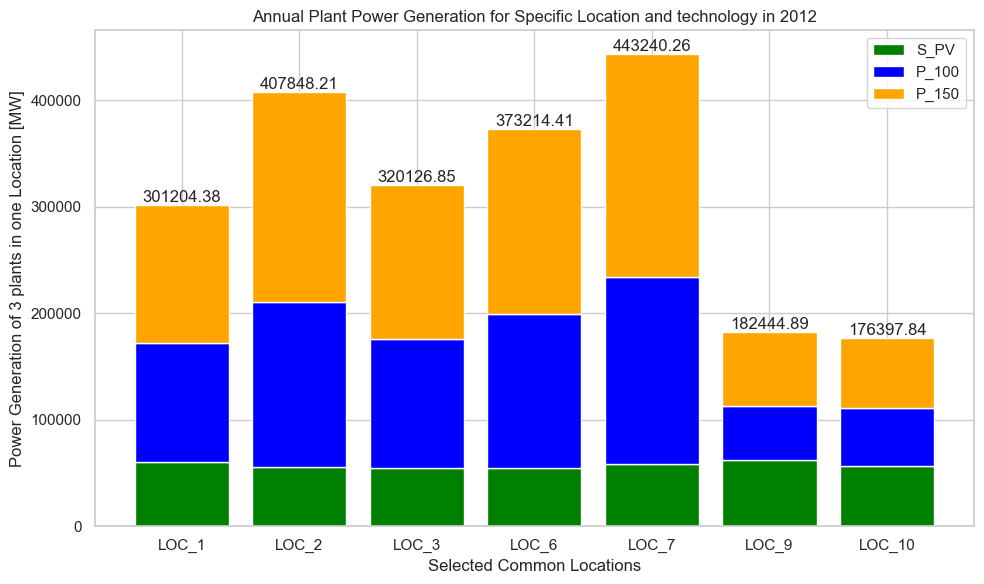

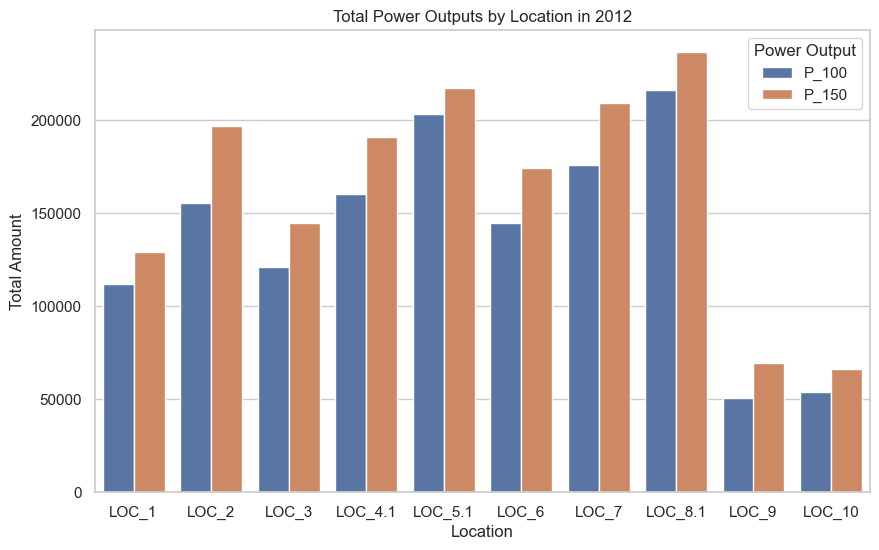

C:\Users\ngt13\AppData\Local\Temp\ipykernel_13840\416785381.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Tot_wind_2015 = Tot_wind_2015.append({'Location': f'{loc}',
C:\Users\ngt13\AppData\Local\Temp\ipykernel_13840\416785381.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Tot_wind_2015 = Tot_wind_2015.append({'Location': f'{loc}',
C:\Users\ngt13\AppData\Local\Temp\ipykernel_13840\416785381.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Tot_wind_2015 = Tot_wind_2015.append({'Location': f'{loc}',
C:\Users\ngt13\AppData\Local\Temp\ipykernel_13840\416785381.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Tot_wind

In [4]:
# Define the output_year function
def output_year(chosen_year):

    # Filter data frames based on chosen year
    df_P_100_year = df_P_100[df_P_100['time'].dt.year == chosen_year]
    df_P_150_year = df_P_150[df_P_150['time'].dt.year == chosen_year]
    df_P_PV_year = df_P_PV[df_P_PV['time'].dt.year == chosen_year]

    # Extract the necessary columns for each data frame
    arr_w = ['time', 'LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.1', 'LOC_5.1', 'LOC_6', 'LOC_7', 'LOC_8.1', 'LOC_9', 'LOC_10']
    arr_s = ['time', 'LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.2', 'LOC_5.2', 'LOC_6', 'LOC_7', 'LOC_8.2', 'LOC_9', 'LOC_10']

    df_P_100_year = df_P_100_year[arr_w]
    df_P_150_year = df_P_150_year[arr_w]
    df_P_PV_year = df_P_PV_year[arr_s]

    # Calculate P_100 for each location
    P_100 = {}
    for loc in df_P_100_year.columns[1:]:
        P_100[loc] = df_P_100_year[loc] * 50

    # Calculate P_150 for each location
    P_150 = {}
    for loc in df_P_150_year.columns[1:]:
        P_150[loc] = df_P_150_year[loc] * 50

    # Calculate S_PV for each location
    S_PV = {}
    for loc in df_P_PV_year.columns[1:]:
        S_PV[loc] = df_P_PV_year[loc] * 50

    for loc in df_P_100_year.columns[1:]:
        print(f"P_100_{chosen_year}_{loc}: {P_100[loc].sum()}")

    for loc in df_P_150_year.columns[1:]:
        print(f"P_150_{chosen_year}_{loc}: {P_150[loc].sum()}")

    for loc in df_P_PV_year.columns[1:]:
        print(f"S_PV_{chosen_year}_{loc}: {S_PV[loc].sum()}")


    # Get the location names from the DataFrame column names
    location_names = df_P_100_year.columns[1:]
    # for solar technology
    loc_names = df_P_PV_year.columns[1:]

    # Combine the dictionaries into a single DataFrame for wind power
    data_w = pd.DataFrame({'Location': location_names,
                          'P_100': [P_100[loc].sum() for loc in location_names],
                          'P_150': [P_150[loc].sum() for loc in location_names]})

    # Combine the dictionaries into a single DataFrame for solar power
    data_s = pd.DataFrame({'Location': loc_names,
                          'S_PV': [S_PV[loc].sum() for loc in loc_names]})

    # Filter the data frames for specific locations
    locations_to_plot = ['LOC_1', 'LOC_2', 'LOC_3', 'LOC_6', 'LOC_7', 'LOC_9', 'LOC_10']
    filtered_data_w = data_w[data_w['Location'].isin(locations_to_plot)]
    filtered_data_solar = data_s[data_s['Location'].isin(locations_to_plot)]

    # Calculate the sum of values for each location
    sum_values = []
    for location in locations_to_plot:
        sum_value = (
            filtered_data_solar.loc[filtered_data_solar['Location'] == location, 'S_PV'].sum() +
            filtered_data_w.loc[filtered_data_w['Location'] == location, 'P_100'].sum() +
            filtered_data_w.loc[filtered_data_w['Location'] == location, 'P_150'].sum()
        )
        sum_values.append(sum_value)

    # Create a stacked bar plot
    sns.set(style='whitegrid')
    plt.figure(figsize=(10, 6))

    # Calculate the height of each bar (total sum of S_PV, P_100, and P_150)
    height_s_pv = [filtered_data_solar.loc[filtered_data_solar['Location'] == loc, 'S_PV'].sum() for loc in locations_to_plot]
    height_p100 = [filtered_data_w.loc[filtered_data_w['Location'] == loc, 'P_100'].sum() for loc in locations_to_plot]
    height_p150 = [filtered_data_w.loc[filtered_data_w['Location'] == loc, 'P_150'].sum() for loc in locations_to_plot]

    # Create the stacked bar plot
    bar_width = 0.35
    index = range(len(locations_to_plot))

    # Plot S_PV
    plt.bar(index, height_s_pv, label='S_PV', color='green')

    # Plot P_100 on top of S_PV
    plt.bar(index, height_p100, label='P_100', color='blue', bottom=height_s_pv)

    # Plot P_150 on top of S_PV and P_100
    plt.bar(index, height_p150, label='P_150', color='orange', bottom=[sum(x) for x in zip(height_s_pv, height_p100)])

    for i in index:
        total_value = height_s_pv[i] + height_p100[i] + height_p150[i]
        plt.text(i, total_value, f"{total_value:.2f}", ha='center', va='bottom')



    plt.xlabel('Selected Common Locations')
    plt.ylabel('Power Generation of 3 plants in one Location [MW]')
    plt.title(f'Annual Plant Power Generation for Specific Location and technology in {chosen_year}')

    plt.xticks(index, locations_to_plot)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Combine the dictionaries into a single DataFrame
    data = pd.DataFrame({'Location': location_names,
                        'P_100': [P_100[loc].sum() for loc in location_names],
                        'P_150': [P_150[loc].sum() for loc in location_names]})

    # Melt the DataFrame to transform it into long format
    data_melted = data.melt(id_vars='Location', var_name='Power Output', value_name='Total Amount')

    # Plot using Seaborn
    sns.set(style='whitegrid')
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Location', y='Total Amount', hue='Power Output', data=data_melted)

    plt.xlabel('Location')
    plt.ylabel('Total Amount')
    plt.title(f'Total Power Outputs by Location in {chosen_year}')

    plt.legend(title='Power Output')
    plt.show()
    # Access the calculated values and store them in Tot_generation_2015
    # Create an empty DataFrame to store the results
    columns_w = ['Location', 'P_100', 'P_150']
    columns_s = ['Location','S_PV']
    Tot_wind_2015 = pd.DataFrame(columns=columns_w)
    Tot_solar_2015 = pd.DataFrame(columns=columns_s)
    
    # Access the calculated values and append them to Tot_generation_2015
    for loc, values in P_100.items():
        Tot_wind_2015 = Tot_wind_2015.append({'Location': f'{loc}',
                                                          'P_100': values.sum(),
                                                          'P_150': P_150[loc].sum()},
                                                         ignore_index=True)
    
    for loc, values in S_PV.items():
        Tot_solar_2015 = Tot_solar_2015.append({'Location': f'{loc}',
                                                          'S_PV': values.sum(),
                                                          },
                                                         ignore_index=True)
    Tot_gen_2015 = pd.merge(Tot_solar_2015, Tot_wind_2015, on='Location')
    return Tot_gen_2015
    # return Tot_solar_2015
    # return Tot_wind_2015
    # return S_PV['LOC_1']
    # return P_100['LOC_1', 'LOC_2']
    
# Example usage:
chosen_year = 2015
# Tot_2015 = output_year(chosen_year)
# print(Tot_gen_2015)

# For future scenarios:
fut_ann_gen= output_year(2012)

In [3]:
def out_year_timeseries_100(sel_year, locations):
    # Filter the column 'time' inside df_P_100_year for the chosen year
    df_P_100_year = df_P_100[df_P_100['time'].dt.year == sel_year]
    
    # Create a dictionary to store the time series data for each location
    time_series = {}
    
    # Get the time series data for each location
    for location in locations:
        time_series[location] = df_P_100_year[location]
    
    return time_series

sel_year = 2012
locs_w = ['LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.1', 'LOC_5.1','LOC_6', 'LOC_7', 'LOC_8.1','LOC_9', 'LOC_10']
locs_s = ['LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.2', 'LOC_5.2','LOC_6', 'LOC_7', 'LOC_8.2','LOC_9', 'LOC_10']
time_series_data_100 = out_year_timeseries_100(sel_year, locs_w)

loc_data_series_100 = {}
for location, series in time_series_data_100.items():
    loc_data_series_100[location] = series
P_100_1_data = loc_data_series_100['LOC_1']
P_100_2_data = loc_data_series_100['LOC_2']
P_100_3_data = loc_data_series_100['LOC_3']
P_100_41_data = loc_data_series_100['LOC_4.1']
P_100_51_data = loc_data_series_100['LOC_5.1']
P_100_6_data = loc_data_series_100['LOC_6']
P_100_7_data = loc_data_series_100['LOC_7']
P_100_81_data = loc_data_series_100['LOC_8.1']
P_100_9_data = loc_data_series_100['LOC_9']
P_100_10_data = loc_data_series_100['LOC_10']


def out_year_timeseries_150(sel_year, locations):
    # Filter the column 'time' inside df_P_150_year for the chosen year
    df_P_150_year = df_P_150[df_P_150['time'].dt.year == sel_year]
    
    # Create a dictionary to store the time series data for each location
    time_series = {}
    
    # Get the time series data for each location
    for location in locations:
        time_series[location] = df_P_150_year[location]
    
    return time_series

sel_year = 2012
locs_w = ['LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.1', 'LOC_5.1', 'LOC_6', 'LOC_7', 'LOC_8.1', 'LOC_9', 'LOC_10']
locs_s = ['LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.2', 'LOC_5.2', 'LOC_6', 'LOC_7', 'LOC_8.2', 'LOC_9', 'LOC_10']
time_series_data_150 = out_year_timeseries_150(sel_year, locs_w)

loc_data_series_150 = {}
for location, series in time_series_data_150.items():
    loc_data_series_150[location] = series
P_150_1_data = loc_data_series_150['LOC_1']
P_150_2_data = loc_data_series_150['LOC_2']
P_150_3_data = loc_data_series_150['LOC_3']
P_150_41_data = loc_data_series_150['LOC_4.1']
P_150_51_data = loc_data_series_150['LOC_5.1']
P_150_6_data = loc_data_series_150['LOC_6']
P_150_7_data = loc_data_series_150['LOC_7']
P_150_81_data = loc_data_series_150['LOC_8.1']
P_150_9_data = loc_data_series_150['LOC_9']
P_150_10_data = loc_data_series_150['LOC_10']



# # Create separate series for each location
# for locs_w, series in time_series_data.items():
#     locals()[f"loc_{locs_w}_data"] = series
  


In [12]:
def compare_csv(file1, file2):
    
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    differing_rows = pd.concat([df1, df2]).drop_duplicates(keep=False)
    num_differences = len(differing_rows)
        
    if num_differences > 0:
        print(f"{num_differences} difference(s) found between the CSV files:")
        print(differing_rows)
    else:
        print("No differences found between the CSV files.")

compare_csv("P_PV.csv", "P_PV_old.csv")

185716 difference(s) found between the CSV files:
                       time   LOC_1   LOC_2   LOC_3  LOC_4.2  LOC_5.2   LOC_6  \
8       2012-01-01 08:00:00 -0.0003 -0.0003 -0.0003  -0.0003   0.2096 -0.0003   
9       2012-01-01 09:00:00  0.0058  0.0024  0.0104  -0.0003   0.4052 -0.0003   
10      2012-01-01 10:00:00  0.0154  0.0038  0.0151  -0.0003   0.5501  0.0031   
11      2012-01-01 11:00:00  0.0169  0.0017  0.0134   0.0022   0.6336  0.0128   
12      2012-01-01 12:00:00  0.0211  0.0030  0.0125   0.0061   0.6239  0.0204   
...                     ...     ...     ...     ...      ...      ...     ...   
184092  2020-12-31 12:00:00  0.0755  0.2379  0.4172   0.0515   0.7903  0.2482   
184093  2020-12-31 13:00:00  0.0505  0.1938  0.3303   0.0445   0.7828  0.2189   
184094  2020-12-31 14:00:00  0.0325  0.0994  0.1620   0.0263   0.6754  0.1231   
184095  2020-12-31 15:00:00  0.0018 -0.0003 -0.0003   0.0012   0.4290  0.0340   
184096  2020-12-31 16:00:00 -0.0003 -0.0003 -0.0003  -0.000

In [8]:
# We read the stats and compare them:
# BFH_1400,DE4-N_1300,Zary_1250,DE4-W_1300,JAEN_2100,NL_1300,DK2_1300,EXTR_2100,DE4-S_1400,PL_1300
# BFH_LW,Benz_MW,Zary_LW,Uki_MW,Off_NL_HW,Fland_NL_MW,DK2_HW,OFF_DK2_HW,DE4-S_LW,PL_LW13,BFH_LW_1,Benz_MW_1,Zary_LW_1,Uki_MW_1,Off_NL_HW_1,Fland_NL_MW_1,DK2_HW_1,OFF_DK2_HW_1,DE4-S_LW_1,PL_LW13_1


9